# Experiments with Changing $C_{rad}$

We use numeric experiments to test whether the Regret is sublinear.

In this section, we take the $C_{rad}=\log(d*T*m)$ as T changing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conduct the experiment once
from Source.env import Env_FixedConsumption
from Source.agent import PrimalDualBwK
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

random_seed = 12345
np.random.seed(random_seed)

# generate parameter setting
d = 5
m = 5
B = 1000
n_experiments = 5
r_list = np.random.uniform(low=0.0, high=1.0, size=m)
d_list = np.random.uniform(low=0.0, high=1.0, size=(d, m))

# calculate the OPT_LP
res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))

reward_ = list()
for exp_index in range(n_experiments):
    reward_exp_ = list()
    for T in tqdm(range(1, B + 1)):
        env = Env_FixedConsumption(r_list=r_list, d_list=d_list, m=m, B=T, d=d, random_seed=random_seed + exp_index)
        agent = PrimalDualBwK(d=d, m=m, B=T, Crad=np.log(d * T * m))
        reward_T = list()
        while not env.if_stop():
            arm = agent.action()
            consumption, reward = env.response(arm=arm)
            agent.observe(reward=reward, consumption=consumption)
            reward_T.append(reward)
        reward_exp_.append(np.sum(reward_T))
    reward_.append(np.array(reward_exp_))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.41it/s]


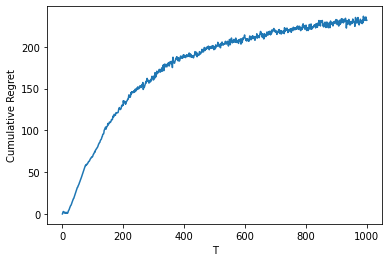

In [3]:
# get the experiments with minimum length and truncate others
reward_ = np.array(reward_)
reward_ = np.mean(reward_, axis=0)

# plot the figure
reward_OPT_LP = np.cumsum(np.ones(B) * (-res.fun)) # LP benchmark
plt.plot(np.arange(1, B + 1), reward_OPT_LP[:B] - reward_[:B], label="regret")
plt.xlabel("T")
plt.ylabel("Cumulative Regret")
plt.show()

It seems that the curve is sublinear.

# Experiments with Fixed $C_{rad}$

In this section, we use numeric experiments to test whether the sublinear Regret is sensitive to $C_{rad}$. 

In other words, we will use a fixed $C_{rad}$ no matter what $T$ is. And we want to see whether the cumulative regret of a single run is still sublinear. 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# conduct the experiment once
from Source.env import Env_FixedConsumption
from Source.agent import PrimalDualBwK
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

random_seed = 12345
np.random.seed(random_seed)

# generate parameter setting
d = 5
m = 5
B = 1000
n_experiments = 5
r_list = np.random.uniform(low=0.0, high=1.0, size=m)
d_list = np.random.uniform(low=0.0, high=1.0, size=(d, m))

# calculate the OPT_LP
res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))

reward_ = list()
for exp_index in range(n_experiments):
    env = Env_FixedConsumption(r_list=r_list, d_list=d_list, m=m, B=T, d=d, random_seed=random_seed + exp_index)
    agent = PrimalDualBwK(d=d, m=m, B=T, Crad=np.log(d * T * m))
    reward_T = list()
    while not env.if_stop():
        arm = agent.action()
        consumption, reward = env.response(arm=arm)
        agent.observe(reward=reward, consumption=consumption)
        reward_T.append(reward)
    reward_.append(np.array(reward_T))

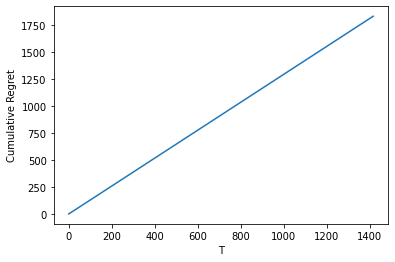

In [6]:
# get the minimum length of experiments and truncate others
minimum_length = 99999
for exp_index in range(n_experiments):
    if len(reward_[exp_index]) < minimum_length:
        minimum_length = len(reward_[exp_index])
reward_ = [reward_record[:minimum_length] for reward_record in reward_]
reward_ = np.array(reward_)
reward_ = np.mean(reward_, axis=0)

# plot the figure
reward_OPT_LP = np.cumsum(np.ones(minimum_length) * (-res.fun)) # LP benchmark
plt.plot(np.arange(1, minimum_length + 1), reward_OPT_LP[:minimum_length] - reward_[:minimum_length], label="regret")
plt.xlabel("T")
plt.ylabel("Cumulative Regret")
plt.show()

The figure implies we can not use a large $C_{rad}$ when the T is small.

# Experiments with stochastic independent consumptions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# conduct the experiment once
from Source.env import Env_Uncorrelated_Reward, Env_Correlated_Uniform
from Source.agent import PrimalDualBwK
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

random_seed = 12345
np.random.seed(random_seed)

# generate parameter setting
d = 5
m = 5
B = 1000
n_experiments = 5
r_list = np.random.uniform(low=0.0, high=1.0, size=m)
d_list = np.random.uniform(low=0.0, high=1.0, size=(d, m))

# calculate the OPT_LP
res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))

reward_ = list()
for exp_index in range(n_experiments):
    reward_exp_ = list()
    for T in tqdm(range(1, B + 1)):
        env = Env_Uncorrelated_Reward(r_list=r_list, d_list=d_list, m=m, B=T, d=d, random_seed=random_seed + exp_index)
        agent = PrimalDualBwK(d=d, m=m, B=T, Crad=np.log(d * T * m))
        reward_T = list()
        while not env.if_stop():
            arm = agent.action()
            consumption, reward = env.response(arm=arm)
            agent.observe(reward=reward, consumption=consumption)
            reward_T.append(reward)
        reward_exp_.append(np.sum(reward_T))
    reward_.append(np.array(reward_exp_))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.73it/s]


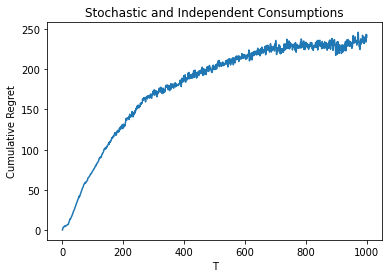

In [4]:
# get the experiments with minimum length and truncate others
reward_ = np.array(reward_)
reward_ = np.mean(reward_, axis=0)

# plot the figure
reward_OPT_LP = np.cumsum(np.ones(B) * (-res.fun)) # LP benchmark
plt.plot(np.arange(1, B + 1), reward_OPT_LP[:B] - reward_[:B], label="regret")
plt.xlabel("T")
plt.ylabel("Cumulative Regret")
plt.title("Stochastic and Independent Consumptions")
plt.show()

# Experiments with Correlated consumptions

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# conduct the experiment once
from Source.env import Env_Uncorrelated_Reward, Env_Correlated_Uniform
from Source.agent import PrimalDualBwK
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

random_seed = 12345
np.random.seed(random_seed)

# generate parameter setting
d = 5
m = 5
B = 1000
n_experiments = 5
r_list = np.random.uniform(low=0.0, high=1.0, size=m)
d_list = np.random.uniform(low=0.0, high=1.0, size=(d, m))

# calculate the OPT_LP
res = linprog(c=-r_list, A_ub=d_list, b_ub=1 * np.ones(d))

reward_ = list()
for exp_index in range(n_experiments):
    reward_exp_ = list()
    for T in tqdm(range(1, B + 1)):
        env = Env_Correlated_Uniform(r_list=r_list, d_list=d_list, m=m, B=T, d=d, random_seed=random_seed + exp_index)
        agent = PrimalDualBwK(d=d, m=m, B=T, Crad=np.log(d * T * m))
        reward_T = list()
        while not env.if_stop():
            arm = agent.action()
            consumption, reward = env.response(arm=arm)
            agent.observe(reward=reward, consumption=consumption)
            reward_T.append(reward)
        reward_exp_.append(np.sum(reward_T))
    reward_.append(np.array(reward_exp_))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.39it/s]


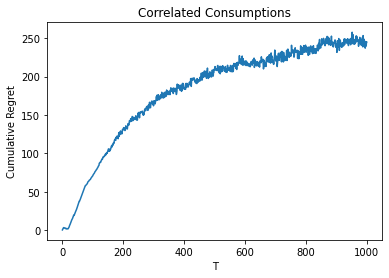

In [7]:
# get the experiments with minimum length and truncate others
reward_ = np.array(reward_)
reward_ = np.mean(reward_, axis=0)

# plot the figure
reward_OPT_LP = np.cumsum(np.ones(B) * (-res.fun)) # LP benchmark
plt.plot(np.arange(1, B + 1), reward_OPT_LP[:B] - reward_[:B], label="regret")
plt.xlabel("T")
plt.ylabel("Cumulative Regret")
plt.title("Correlated Consumptions")
plt.show()